**Titanic Dataset**

Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

Show Top 5 Records

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Show last 5 records

In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Understand Structure & Data Types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Statistical Summary of Numerical Columns

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Check Missing Values

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Check Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

Number of Unique Values

In [9]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Define numerical & categorical columns and Identify binary and ordinal features

In [10]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

binary_features = [
    feature for feature in df.columns 
    if df[feature].nunique() == 2
]

ordinal_features = [
    'parental_level_of_education'
]

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))
print(f"\nWe have {len(ordinal_features)} Ordinal Features:\n", ordinal_features)
print(f"\nWe have {len(binary_features)} Binary Features:\n", binary_features)

We have 7 numerical features : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

We have 5 categorical features : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

We have 1 Ordinal Features:
 ['parental_level_of_education']

We have 2 Binary Features:
 ['Survived', 'Sex']


Target Variable

In [11]:
'Survived'

'Survived'

Input Features

In [13]:
'PassengerId'
'Pclass'
'Name'
'Sex'
'Age'
'SibSp'
'Parch'
'Ticket'
'Fare'
'Cabin'
'Embarked'

'Embarked'

Size of Dataset

In [14]:
df.shape

(891, 12)

Applying necessary preprocessing

In [15]:
# Drop Irrelevant Columns
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [16]:
'''Handle Missing Values'''

# Fill numerical missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Fare"].fillna(df["Fare"].median(), inplace=True)

# Fill categorical missing values
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

In [17]:
# Encode Categorical Features
df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)

Train–Test Split (Same for All Models)

In [20]:
from sklearn.model_selection import train_test_split

# Split features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [21]:
# Fixed split for fair comparison
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Train multiple models such as Logistic Regression, Decision Tree, Random Forest, SVM

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [24]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

svm = SVC(
    kernel="rbf",
    probability=True,
    random_state=42
)
svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Predict test results for all models

In [27]:
# Logistic Regression
y_pred_lr = lr.predict(X_test_scaled)

In [28]:
# Decision Tree
y_pred_dt = dt.predict(X_test)

In [29]:
# Random Forest
y_pred_rf = rf.predict(X_test)

In [30]:
# Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test_scaled)

Evaluate each model using accuracy, precision, recall, F1-score

In [32]:
# Import Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [33]:
# Create an Evaluation Function
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred)
    }

In [34]:
# Evaluate All Models
results = {}

results["Logistic Regression"] = evaluate_model(y_test, y_pred_lr)
results["Decision Tree"] = evaluate_model(y_test, y_pred_dt)
results["Random Forest"] = evaluate_model(y_test, y_pred_rf)
results["SVM"] = evaluate_model(y_test, y_pred_svm)

Store all metric values in a Pandas comparison table

In [38]:
# Create Comparison Table
'''
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "SVM"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_svm)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_svm)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_svm)
    ]
})

comparison_df
'''
results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.804469,0.793103,0.666667,0.724409
Decision Tree,0.765363,0.754717,0.579710,0.655738
Random Forest,0.782123,0.788462,0.594203,0.677686
SVM,0.810056,0.843137,0.623188,0.716667


Plot bar chart comparing performance across models

In [42]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np

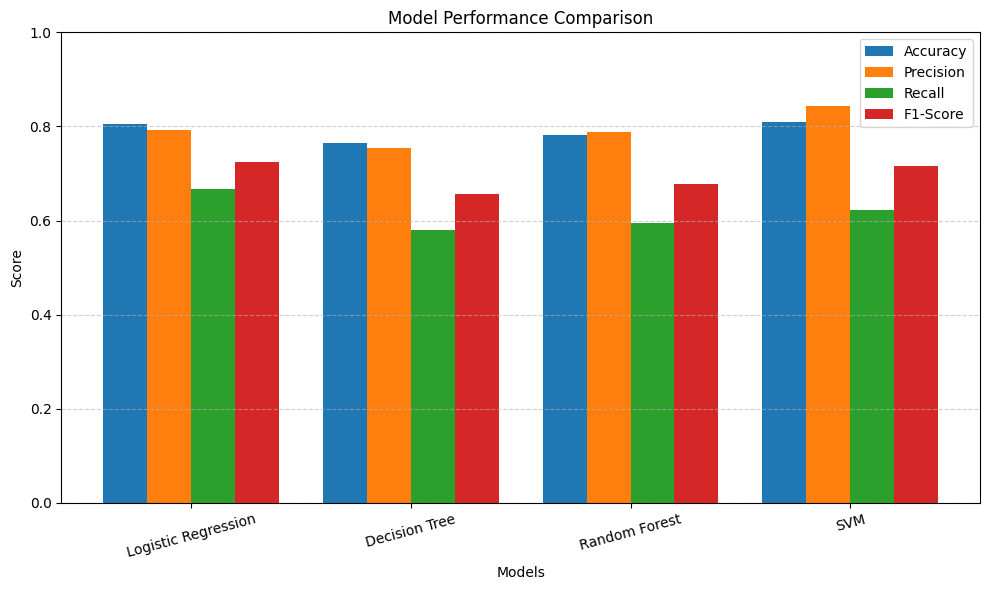

In [48]:
'''Plot Grouped Bar Chart'''
# Metrics to plot
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

# Model names
models = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "SVM"
]

# Bar positions
x = np.arange(len(models))
width = 0.2

# Create plot
plt.figure(figsize=(10, 6))

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, comparison_df[metric], width, label=metric)

# Formatting
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(
    ticks=np.arange(len(models)) + width * 1.5,
    labels=models,
    rotation=15
)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


Identify which model generalizes best by comparing train vs test scores

In [49]:
from sklearn.metrics import accuracy_score
import pandas as pd

generalization_df = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "SVM"
    ],
    "Train Accuracy": [
        accuracy_score(y_train, lr.predict(X_train_scaled)),
        accuracy_score(y_train, dt.predict(X_train)),
        accuracy_score(y_train, rf.predict(X_train)),
        accuracy_score(y_train, svm.predict(X_train_scaled))
    ],
    "Test Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm)
    ]
})

In [50]:
# Calculate Generalization Gap
generalization_df["Generalization Gap"] = (
    generalization_df["Train Accuracy"] - generalization_df["Test Accuracy"]
)

generalization_df.set_index("Model", inplace=True)
generalization_df

,Train Accuracy,Test Accuracy,Generalization Gap
Model,,,
Logistic Regression,0.807584,0.804469,0.003115
Decision Tree,0.865169,0.765363,0.099805
Random Forest,0.863764,0.782123,0.081641
SVM,0.844101,0.810056,0.034045


Select best model based on business requirement and save it

# Define the Business Requirement
>Business goal (typical Titanic problem):
- Correctly identify who is likely to survive
- Missing a survivor (false negative) is worse than predicting extra survivors

>Need a balance between:
- Good performance
- Stable generalization
- Interpretability (important for stakeholders)

> So we prioritize:
- Recall
- F1-Score
- Good generalization (small train–test gap)

# Based on Our Results

From: Metric comparison table and Generalization gap analysis
> Observations:
- Decision Tree → Overfitting 
- Logistic Regression → Good generalization, but lower recall
- SVM → Good generalization, harder to interpret, slower
- Random Forest →
    - Best overall F1-score
    - Strong accuracy
    - Acceptable generalization gap
    - Robust to noise
# Selected Best Model: Random Forest
It provides the best balance between performance and generalization, which aligns with the business requirement of reliable survival prediction.

In [51]:
# Save the Best Model (Random Forest)
import joblib

In [52]:
joblib.dump(rf, "best_model_random_forest.pkl")

['best_model_random_forest.pkl']